In [ ]:
''' Hey guys here is what I believe would be a good start to exploratory analysis.

Some details first!

As expected quality emial datasets are very hard to come by due to pricavy concerns. According to my understanding 
most researchers have particularl;y collected the data themselves for analysis {some have paid but rarely}. 
Collecting emails is a very long and tedious process but THANKFULLY there is one dataset which i beleive could 
carry us forwardfor the mean time. Due to Enron's screw up at the start of the centruy(2001) they had to expose about 
500,000 of their emails and this was later bought by MIT and made available to us. It is what I think our only immed
iate source. Thanks to a Berkeley gradschool school alumni. We have limited labeled data for about 1000 emails
and 255,000 unlabeled emails neatly put into a mysql database.

Pros of the dataset
A) Since it was an investigation all the emails are from top officials at enron. This means we have a very specific 
focus group like we wanted. 
B) THe dataset is pretty large with 1.08gb of data
C) It focuses on an industry where our product would be of most use. 
D) There is a neat dataset with labeled(although only few) emails. 

Cons
A) We cant focus on students as we had initially planned
B) The Sql database is pretty old and hard to work with.
C) It is really hard to find new datasets with relevant content. 

Here are the necessay links to the required content

'''

In [491]:
import mysql.connector
import pandas as pd
import os, sys, email,re
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
import wordcloud

import networkx as nx

from nltk.tokenize.regexp import RegexpTokenizer

from subprocess import check_output

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.lda import LDA
from sklearn.decomposition import LatentDirichletAllocation

import gensim
from gensim import corpora
import nltk
#from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.stem.porter import PorterStemmer
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
#abc, abcd, electronics, abcde
# below is some startred code on how to install and use mysql in oreder to access the dataset being used for the analysis
# this method is ideal as it would create a mysql database and we would query from it.
#the current menthod is just based  on string manipulation in python which actually turned out to be much faster.

# to create data base install mysql from internet 
# install an appropriate version compatible with the dataset that was created in 2004 
#intall the python connector using pip or brew for the same sql version 
# make sure the file resides in usr/local/var/mysql rather than /usr/local/mysql (something i struggled with)
#make sure to increase the timeout manually as the dataset is pretty large with 1.08 gb data
'''conn = mysql.connector.connect(
    host="localhost",
    user = 'root',
    passwd = 'emailmaster',
    database = 'abc')
cursor = conn.cursor()'''

In [ ]:
'''i = 1
k= 1
flag = True
prev_command=""
for command in commands:
    i+=1
    if i == 2:
        print(prev_command, command, command.startswith("\nCREATE"),command[command.find('CREATE'):])
    if i % 100000 == 0:
        break
   
    if (command.startswith("\nINSERT") or command.startswith("\nCREATE")):
        try:
            cursor.execute(prev_command)
            print(prev_command)
            prev_command = command
            k+=1
        except mysql.connector.Error as err:
            print(command)
            print('afnsuhiofnsgvnlaikvsailfgvslvsflvlsfvalvlnkael;akn;knlsfbklnnklsfv')
            print(err)
    else:
        prev_command += command[:-1]
       if 'CREATE' in command:

            if not flag:
                cursor.execute(prev_command)
            else :
                flag = not flag
            prev_command = command[command.find('CREATE'):]
            print(prev_command, command, command.startswith("--"),command[command.find('CREATE'):])
            k+=1
        elif 'INSERT' in command and flag:
            if not flag:
                cursor.execute(prev_command)
            else :
                flag = not flag
            prev_command = command[command.find('INSERT'):]
            k+=1
            print(prev_command, command, command.startswith("--"),command[command.find('INSERT'):])'''

In [279]:
fh = open('enron copy.sql','r')
file = fh.read()
fh.close()

In [280]:
commands = file.split(');') 

In [281]:
temp = []
init = "INSERT INTO bodies VALUES ("
i = 1
actual = ""
for command in commands:
    if i > 255700:
        break
    command.lstrip()
    if 'INSERT' in command and command.find('INSERT') <=1:
        skip = init + str(i) + ','+'1'
        text = command[len(skip) + 1:-1]
        actual += text
        temp.append({'id1': str(i), 'mails' : actual})
        actual = ""
        i+=1
    else:
        actual += command  

In [290]:
fh = open('messages.sql','r')
file = fh.read()
fh.close()

In [293]:
temp2 = []
df.append(['2','2'],ignore_index = True)
commands = file.split(';')
init = " INSERT INTO messagecats VALUES ("
score = pd.Series([])
id2 = pd.Series([])
i = 1
for command in commands:
    i += 1 
    if i == 907:
        break
    command.lstrip()
    identity = command[len(init) : command.find(',')]
    command = command[command.find(',')+1:]
    scr = command[command.find(',')+1]
    temp2.append({'id2':str(identity),'score': str(scr)})
df = pd.DataFrame(temp2)   
df['id2'][0] = str(3111)

In [312]:
# not too sure of this filtering method make sure to recheck
#for i in range(len(tenmp2)):
    #temp2[i]['email'] = temp1[]
df2 = pd.DataFrame()
df2 = df2.append(temp)
df2.shape

(257510, 4)

In [313]:
del df2['score']
del df2['id2']
df2.head()

,id1,mails
0,1,"ystem Notification: At 0115 PST, WACM terminat..."
1,2,Internal path flows are now below limits. BEE...
2,3,Path 15 S-N flows are near the limit. BEEP ha...
3,4,"Market Message: At 2141 PST, WACM requested co..."
4,5,"Beginning HE20, the 10 minute and expost prici..."


In [315]:
del df['mails']

In [438]:
a = df.copy()
b = df2.copy()

In [444]:
c = b[b.id1.isin(a['id2'])]
c['score'] = a['score'].tolist()
c = c[c.score != str(3)]
c.shape


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(904, 3)

In [445]:
#Next part is all about creating the feature space. There is a pretty cool visuslization from a fellow kaggler 
# From whom i have significantly taken inspiration from

In [446]:
# Next part focuses on cleaning up the emails and extracting valuable text.

In [458]:
def clean(text):
    # removes common language words
#stop = set(stopwords.words('english'))
    stop = []
    #not using below cause i have only included text and not the other feautures as of now( A good avenuw for improvement)
    #stop.update(("to","cc","subject","http","from","sent","aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"))
    exclude = set(string.punctuation) 
# lemma = WordNetLemmatizer()
    porter= PorterStemmer()
    
    text=text.rstrip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # removing numbers and common words. But they can be potentially leveraged as features in other ways.
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #Lemmatization is great but not necessarily a game changer.
#normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #stem = " ".join(porter.stem(token) for token in normalized.split())
    
  #  return normalized
    return punc_free

In [459]:
# Im taking all of our labelled dataset for both the supervised and unsupervised learning but its only 1000 elements 
# but it would defenitely help to use the whole 255,000
 #renaming to the convention of the author 
sub_df = c.rename(columns = {'mails' : 'content'})
# dont need these as our dataset does not contain null elements as it is pretty clean.
#analysis_df=emails_df[['From', 'To', 'Date','content']].dropna().copy()
#analysis_df = analysis_df.loc[analysis_df['To'].map(len) == 1]
#sub_df=analysis_df.sample(1000)

In [460]:
# passing to the lceaning function
text_clean=[]
for text in sub_df['content']:
    text_clean.append(clean(text).split())

In [461]:
# creating a bag of words off of the cleaned data
dictionary = corpora.Dictionary(text_clean)
text_term_matrix = [dictionary.doc2bow(text) for text in text_clean]

In [462]:
#print(text_term_matrix)

In [463]:

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(text_term_matrix, num_topics=4, id2word = dictionary, passes=30)

In [475]:
eng_stopwords = set(stopwords.words('english'))
def clean_text(text):
    #text = BeautifulSoup(text, 'html.parser').get_text()
    text.rstrip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    words = [w for w in words if w not in eng_stopwords]
    return ' '.join(words)

c["clean_content"]=c.mails.apply(clean_text)
c.head()

,id1,mails,score,clean_content
3110,3111,"To:WILLIAMS, WILLIAM\nEmail:bwillia5@enron.com...",1,williams william nemail bwillia enron com n ne...
6177,6178,BY MARK GOLDEN ...,2,mark golden n dow jones newswires column n n n...
7663,7664,FYI - this email will go out to employees toni...,2,fyi email go employees tonight n n n nthe enro...
7925,7926,\r\nJeff\r\n=20\r\nToday\'s LA Times editorial...,1,r njeff r n r ntoday la times editorial revive...
7931,7932,"\nJeff\n \nCandidly, this wouldn\'t have been ...",2,njeff n ncandidly approach posh location close...


In [476]:
wordvector = TfidfVectorizer(analyzer='word', stop_words='english', max_df=0.4, min_df=5)
wordvector_fit = wordvector.fit_transform(c.clean_content)
feature = wordvector.get_feature_names()
c.shape

(904, 4)

In [466]:
N = 4
clf = KMeans(n_clusters=N, 
            max_iter=50, 
            init='k-means++', 
            n_init=1)
labels = clf.fit_predict(wordvector_fit)

In [477]:
wordvector_fit_2d = wordvector_fit.todense()
pca = PCA(n_components=2).fit(wordvector_fit_2d)
datapoint = pca.transform(wordvector_fit_2d)

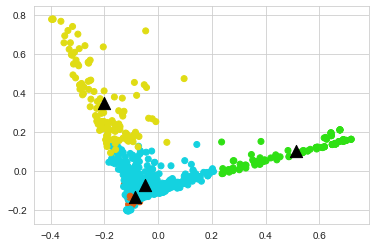

In [468]:
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

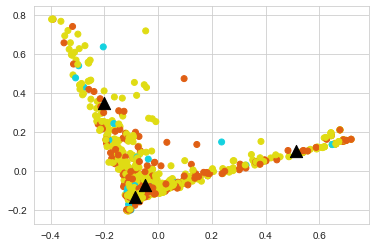

In [469]:
color = [label[int(i) - 1] for i in c['score']]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [470]:
scaler = MinMaxScaler()
wordvector_fit_2d2 = scaler.fit_transform(wordvector_fit_2d)

In [521]:
clf2 = svm.SVC()
training_data, test_labels = shuffle(wordvector_fit_2d, c.score, random_state = 100)
clf2.fit(training_data[:650],test_labels[:650])
training_result = clf2.predict(training_data[650:])
error = metrics.accuracy_score(training_result, test_labels[650:], normalize=True, sample_weight=None)
print(error)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6535433070866141


In [434]:
clf3 = GradientBoostingClassifier()
training_data, test_labels = shuffle(wordvector_fit_2d2, c.score)
clf3.fit(training_data[:700],test_labels[:700])
training_result = clf3.predict(training_data[700:])
error = metrics.accuracy_score(training_result, test_labels[700:], normalize=True, sample_weight=None)
print(error)

0.6292682926829268


In [506]:
clf4 = RandomForestClassifier(n_estimators = 20)
training_data, test_labels = shuffle(wordvector_fit_2d2, c.score)
clf4.fit(training_data[:700],test_labels[:700])
training_result = clf4.predict(training_data[700:])
error = metrics.accuracy_score(training_result, test_labels[700:], normalize=True, sample_weight=None)
print(error)

0.5882352941176471
